# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [26]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
# YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()
        # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']# YOUR CODE HERE
        city_lng = city_weather['coord']['lon']# YOUR CODE HERE
        city_max_temp = city_weather['main']['temp_max']# YOUR CODE HERE
        city_humidity = city_weather['main']['humidity']# YOUR CODE HERE
        city_clouds = city_weather['clouds']['all']# YOUR CODE HERE
        city_wind = city_weather['wind']['speed']# YOUR CODE HERE
        city_country = city_weather['sys']['country']# YOUR CODE HERE
        city_date = city_weather['dt']# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass  
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | kitimat
Processing Record 3 of Set 1 | rabaul
Processing Record 4 of Set 1 | taourirt
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | polyarnyy
Processing Record 7 of Set 1 | kidal
Processing Record 8 of Set 1 | bamboo flat
Processing Record 9 of Set 1 | margaret river
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | greenville
Processing Record 13 of Set 1 | badger
Processing Record 14 of Set 1 | utrik
Processing Record 15 of Set 1 | tura
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | behshahr
Processing Record 19 of Set 1 | isle of lewis
City not found. Skipping...
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | aykol
City not found

In [28]:
#Json Response
url = 'https://api.openweathermap.org/data/2.5/weather?'
country=requests.get(f'{url}q={city}&appid={weather_api_key}').json()
country

{'coord': {'lon': -107.8014, 'lat': 50.2834},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 284.6,
  'feels_like': 283.65,
  'temp_min': 284.6,
  'temp_max': 284.6,
  'pressure': 1008,
  'humidity': 71},
 'visibility': 10000,
 'wind': {'speed': 6.17, 'deg': 0},
 'clouds': {'all': 0},
 'dt': 1718667403,
 'sys': {'type': 1,
  'id': 996,
  'country': 'CA',
  'sunrise': 1718622000,
  'sunset': 1718681073},
 'timezone': -21600,
 'id': 6160603,
 'name': 'Swift Current',
 'cod': 200}

In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,22.51,83,99,5.98,PN,1718667527
1,kitimat,54.0524,-128.6534,22.21,56,40,3.58,CA,1718667527
2,rabaul,-4.1967,152.1721,29.24,72,34,7.45,PG,1718667527
3,taourirt,34.4073,-2.8973,23.60,35,1,0.50,MA,1718667528
4,port-aux-francais,-49.3500,70.2167,3.21,68,32,11.71,TF,1718667528


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.51,83,99,5.98,PN,1718667527
1,kitimat,54.0524,-128.6534,22.21,56,40,3.58,CA,1718667527
2,rabaul,-4.1967,152.1721,29.24,72,34,7.45,PG,1718667527
3,taourirt,34.4073,-2.8973,23.60,35,1,0.50,MA,1718667528
4,port-aux-francais,-49.3500,70.2167,3.21,68,32,11.71,TF,1718667528


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

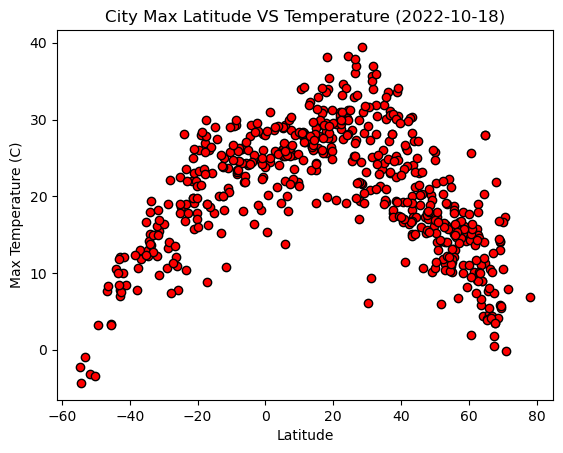

In [33]:
# Build scatter plot for latitude vs. temperature
x=city_data_df['Lat']
y=city_data_df['Max Temp']
plt.scatter(x,y, edgecolors='black',facecolors='red')
#plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors='black',facecolors='blue')
# YOUR CODE HERE

# Incorporate the other graph properties
plt.title('City Max Latitude VS Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

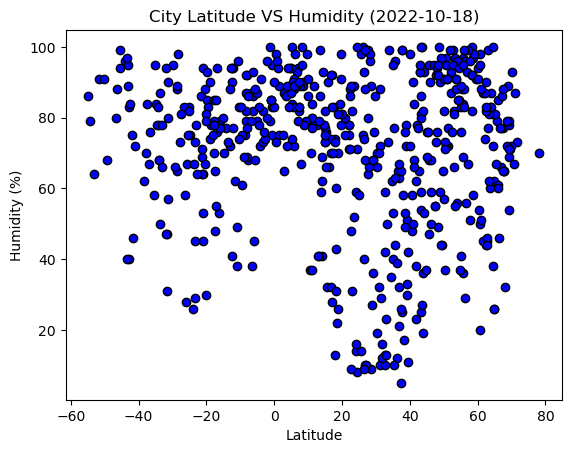

In [34]:
# Build the scatter plots for latitude vs. humidity
x=city_data_df['Lat']
y=city_data_df['Humidity']
plt.scatter(x,y, edgecolors='black',facecolors='blue')
# YOUR CODE HERE

# Incorporate the other graph properties
plt.title('City Latitude VS Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

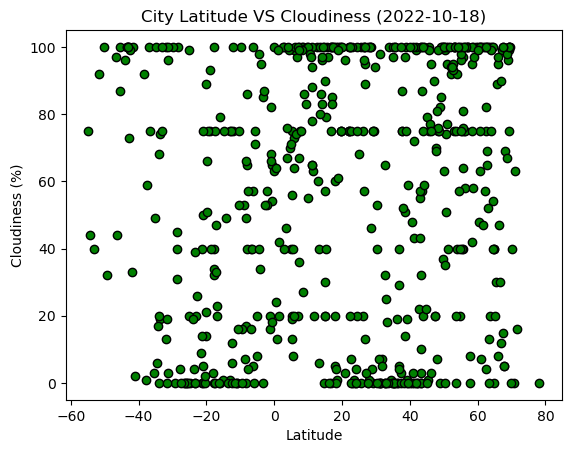

In [35]:
# Build the scatter plots for latitude vs. cloudiness
x=city_data_df['Lat']
y=city_data_df['Cloudiness']
plt.scatter(x,y, edgecolors='black',facecolors='green')
# YOUR CODE HERE

# Incorporate the other graph properties
plt.title('City Latitude VS Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

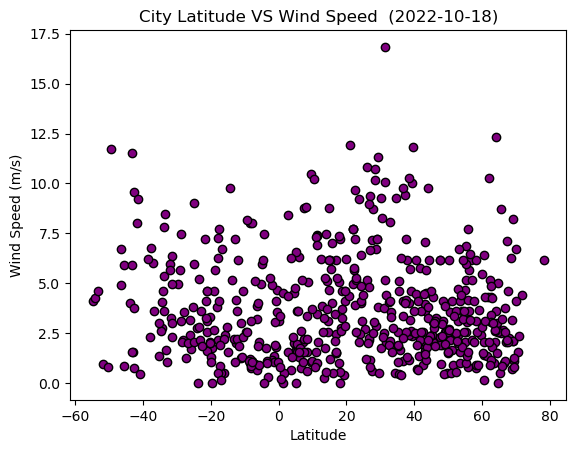

In [36]:
# Build the scatter plots for latitude vs. wind speed
x=city_data_df['Lat']
y=city_data_df['Wind Speed']
plt.scatter(x,y, edgecolors='black',facecolors='purple')
# YOUR CODE HERE

# Incorporate the other graph properties
plt.title('City Latitude VS Wind Speed  (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots
# def create_linear_regression_plot(city_data_df, city_data):

#     value_plots = np.poly1d(np.polyfit(city_data_df[city_data[0]], city_data_df[city_data[1]], 1))

#     # Create a scatter plot of X and y
#     plt.scatter(city_data_df[city_data[0]], city_data_df[city_data[1]])

#     # Plot the linear regression line
#     plt.plot(city_data_df[city_data[0]], value_plots(city_data_df[city_data[0]]), color='red')

#     # Set the plot title and labels
#     plt.title('Linear Regression Plot')
#     plt.xlabel(city_data[0])
#     plt.ylabel(city_data[1])

#     # Display the plot
#     plt.show()

# YOUR CODE HERE
def create_linear_regression_plot(x_line,y_line,title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_line,y_line)
    regress_values = x_line * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

    plt.scatter(x_line, y_line)
    plt.plot(x_line, regress_values, 'r', label=line_eq)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')

    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f'The r-value is: {rvalue**2}')
    plt.show()

In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat'] >= 0]

# YOUR CODE HERE

# Display sample data
# northern_hemi_df.sort_values(by='City_ID', ascending=True)
# northern_hemi_df.sort_values(by='City')
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kitimat,54.0524,-128.6534,22.21,56,40,3.58,CA,1718667527
3,taourirt,34.4073,-2.8973,23.60,35,1,0.50,MA,1718667528
5,polyarnyy,69.1989,33.4478,14.04,78,99,2.10,RU,1718667528
6,kidal,18.4411,1.4078,33.99,22,1,2.75,ML,1718667528
7,bamboo flat,11.7000,92.7167,27.05,89,20,2.06,IN,1718667528


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat'] < 0]
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.51,83,99,5.98,PN,1718667527
2,rabaul,-4.1967,152.1721,29.24,72,34,7.45,PG,1718667527
4,port-aux-francais,-49.3500,70.2167,3.21,68,32,11.71,TF,1718667528
8,margaret river,-33.9500,115.0667,15.13,78,68,7.79,AU,1718667529
9,ushuaia,-54.8000,-68.3000,-2.19,86,75,4.12,AR,1718667303


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5119961418271441


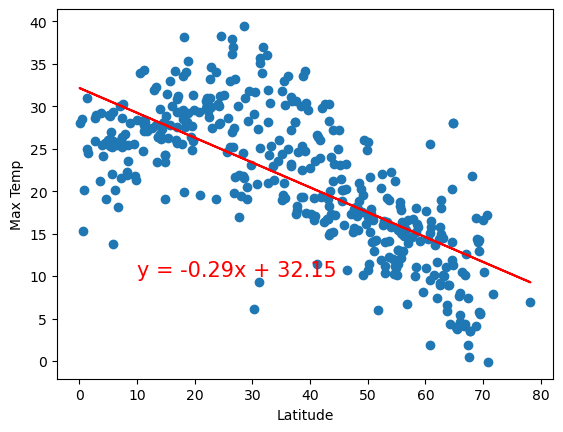

In [40]:
# Linear regression on Northern Hemisphere
x_line=northern_hemi_df['Lat']
y_line=northern_hemi_df['Max Temp']
create_linear_regression_plot(x_line,y_line,'Max Temp',(10,10))
# YOUR CODE HERE

The r-value is: 0.6809079406942481


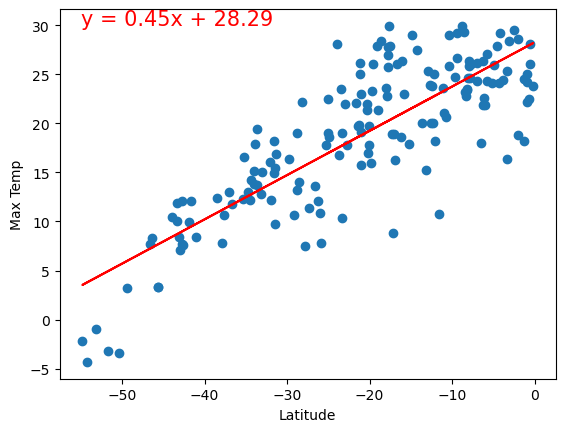

In [41]:
# Linear regression on Southern Hemisphere
x_line=southern_hemi_df['Lat']
y_line=southern_hemi_df['Max Temp']
create_linear_regression_plot(x_line,y_line,'Max Temp',(-55,30))
# YOUR CODE HERE

**Discussion about the linear relationship:** The linear regression plots show a negative correlation between latitude and max temperature in the Northern Hemisphere and a positive correlation between latitude and max temperature in the Southern Hemisphere. This is because as we move towards the poles, the angle of the sun's rays decreases, leading to less solar radiation and colder temperatures. Conversely, as we move towards the equator, the sun's rays are more direct, leading to higher temperatures. The R-value shows the strength of the relationship between latitude and max temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00033648510135280357


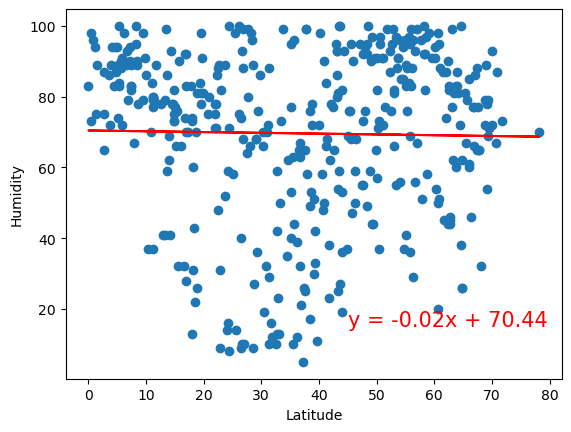

In [42]:
# Northern Hemisphere  
x_line=northern_hemi_df['Lat']
y_line=northern_hemi_df['Humidity']
create_linear_regression_plot(x_line,y_line,'Humidity',(45,15))
# YOUR CODE HERE

The r-value is: 0.005282892715998728


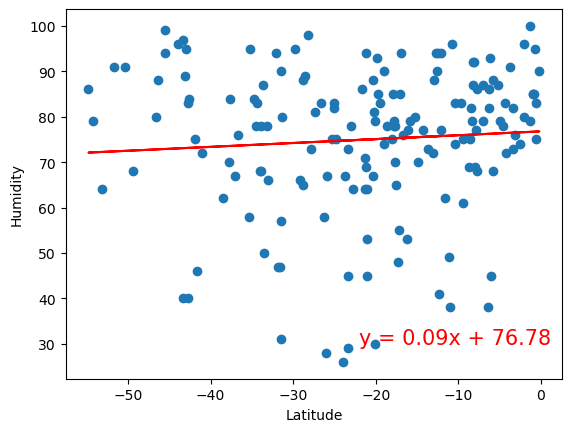

In [43]:
# Southern Hemisphere
x_line=southern_hemi_df['Lat']
y_line=southern_hemi_df['Humidity']
create_linear_regression_plot(x_line,y_line,'Humidity',(-22,30))
# YOUR CODE HERE

**Discussion about the linear relationship:** The linear relationship between latitude and humidity is very weak in both Northern and Southern hemispheres. It is almost non-existent in the Northern hemisphere as shown by the near-zero r-value. In the Southern hemisphere, while there is a slightly positive relationship, it is also very weak with an r-value close to zero. This suggests that there is no significant correlation between latitude and humidity in either hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0005808977395474868


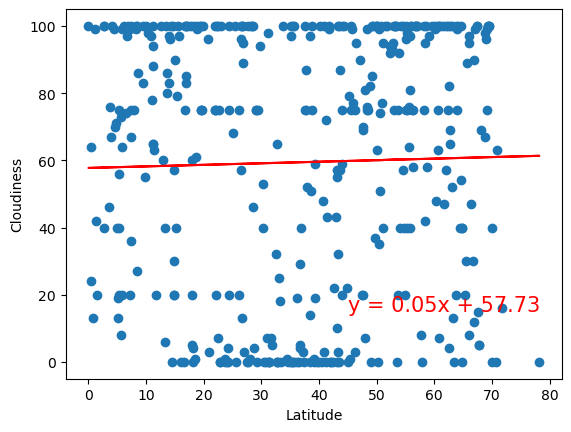

In [44]:
# Northern Hemisphere
x_line=northern_hemi_df['Lat']
y_line=northern_hemi_df['Cloudiness']
create_linear_regression_plot(x_line,y_line,'Cloudiness',(45,15))
# YOUR CODE HERE

The r-value is: 0.03922866201983362


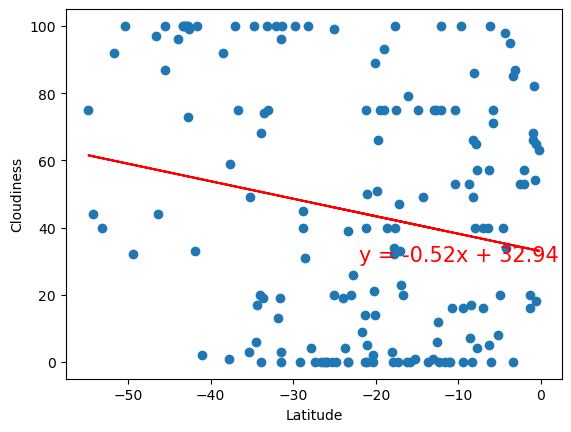

In [45]:
# Southern Hemisphere
x_line=southern_hemi_df['Lat']
y_line=southern_hemi_df['Cloudiness']
create_linear_regression_plot(x_line,y_line,'Cloudiness',(-22,30))
# YOUR CODE HERE

**Discussion about the linear relationship:** The northern hemisphere shows a very weak negative linear correlation between latitude and cloudiness. The southern hemisphere has an even weaker negative linear correlation between latitude and cloudiness. In both cases, the r-value is very small and close to 0, which is an indication of almost no linear relationship between the two variables.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.009092452458448641


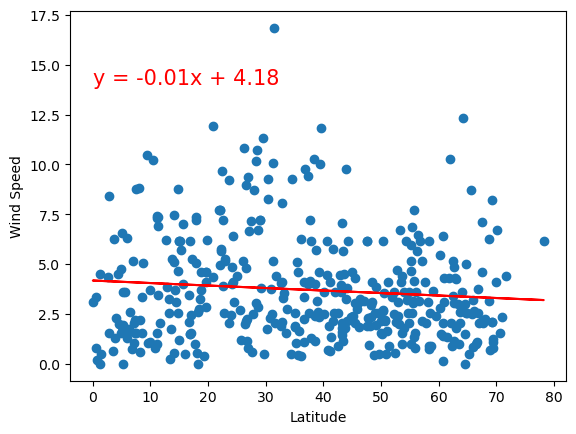

In [46]:
# Northern Hemisphere
x_line=northern_hemi_df['Lat']
y_line=northern_hemi_df['Wind Speed']
create_linear_regression_plot(x_line,y_line,'Wind Speed',(0,14))
# YOUR CODE HERE

The r-value is: 0.06620252366330305


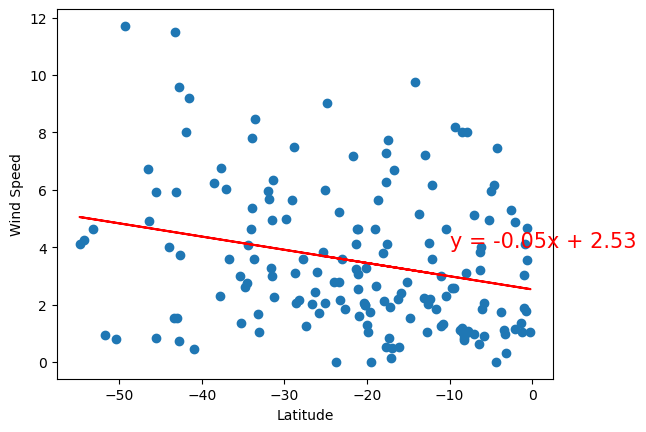

In [47]:
# Southern Hemisphere
x_line=southern_hemi_df['Lat']
y_line=southern_hemi_df['Wind Speed']
create_linear_regression_plot(x_line,y_line,'Wind Speed',(-10,4))
# YOUR CODE HERE

**Discussion about the linear relationship:** The scatter plots and linear regression lines show a weak, almost negligible, negative correlation between latitude and wind speed in both the Northern and Southern hemispheres. This means that there is no clear pattern indicating that wind speed decreases as latitude increases or vice versa.